Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [1]:
# https://github.com/shaiel60/MachineLearningCourse-Ex3
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

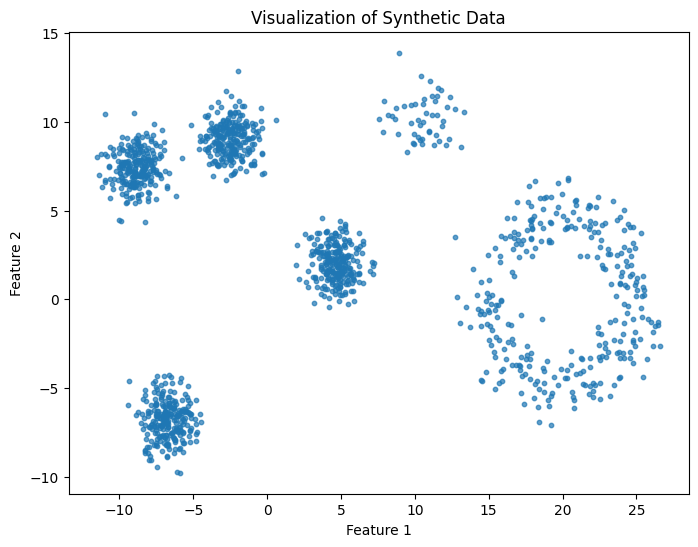

In [2]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

import matplotlib.pyplot as plt

X = create_data(1.0, 1000, 50, 300, 200)

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)  # s=marker size, alpha=transparency
plt.title("Visualization of Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Explore and Optimize KMeans Options:

# Range of cluster numbers to explore
k_range = range(2, 11)  # Try cluster numbers from 2 to 10

# List to store silhouette scores
silhouette_scores = []

# Loop through different cluster numbers
for k in k_range:
    # Initialize KMeans with current k
    kmeans = KMeans(n_clusters=k, init="random", max_iter=500,verbose=5)

    # Fit to the data
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# 2. Choose the Number of Clusters using Silhouette Method:
# Find the optimal k with the highest silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# 3. Train KMeans with the Optimal Number of Clusters:
# Initialize KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k ,init="random", max_iter=500, verbose=5)

# Fit to the data
kmeans_labels = kmeans.fit_predict(X)

print(f"Optimal number of clusters: {optimal_k}")

Initialization complete
Iteration 0, inertia 148694.7229294864.
Iteration 1, inertia 83981.57711171592.
Iteration 2, inertia 83235.39803586928.
Iteration 3, inertia 83213.37549995718.
Converged at iteration 3: center shift 0.0017915916833374664 within tolerance 0.007816900389080656.
Initialization complete
Iteration 0, inertia 226533.82268997355.
Iteration 1, inertia 162806.583408733.
Iteration 2, inertia 157207.55958291361.
Iteration 3, inertia 140192.38277811435.
Iteration 4, inertia 114064.87469366188.
Iteration 5, inertia 90964.7904010008.
Iteration 6, inertia 90154.63303230038.
Iteration 7, inertia 89971.88621245166.
Iteration 8, inertia 89889.28348497555.
Iteration 9, inertia 89733.86797350273.
Iteration 10, inertia 89412.73634692626.
Iteration 11, inertia 88425.50678033856.
Iteration 12, inertia 85440.30575126142.
Iteration 13, inertia 83364.55670354514.
Iteration 14, inertia 83213.38220630205.
Converged at iteration 14: center shift 0.0018206910977751696 within tolerance 0.0078

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1. Explore and Optimize AgglomerativeClustering Options:

# Range of cluster numbers to explore
cluster_range = range(2, 50)  # Try cluster numbers from 2 to 10

# List to store silhouette scores
silhouette_scores = []

# Loop through different cluster numbers
for n_clusters in cluster_range:
    # Initialize AgglomerativeClustering with current number of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

    # Fit to the data
    cluster_labels = agg_clustering.fit_predict(X)

    # Calculate silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# 2. Choose the Number of Clusters using Silhouette Method:
# Find the optimal number of clusters with the highest silhouette score
optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# 3. Train AgglomerativeClustering with the Optimal Number of Clusters:
# Initialize AgglomerativeClustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')

# Fit to the data
agg_labels = agg_clustering.fit_predict(X)

print(f"Optimal number of clusters: {optimal_n_clusters}")

Optimal number of clusters: 6


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.999, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Get cluster labels
labels = dbscan.labels_

# (Optional) Print the cluster labels
print(labels)

[0 1 1 ... 5 5 5]


6. Compare the results and choose the best method for the data


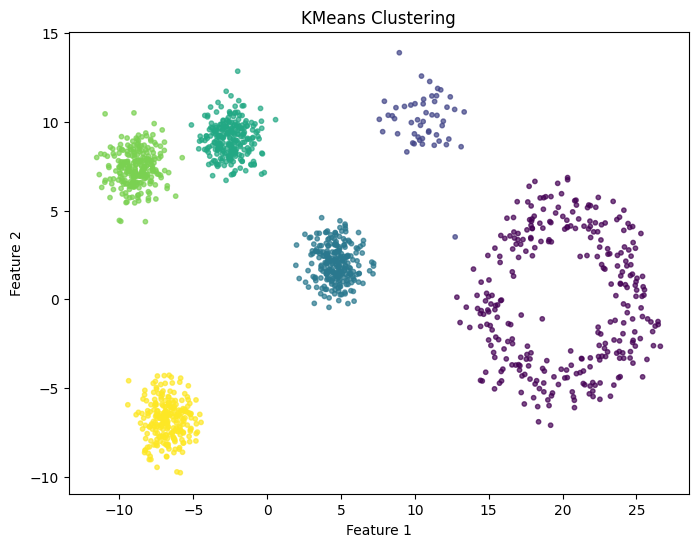

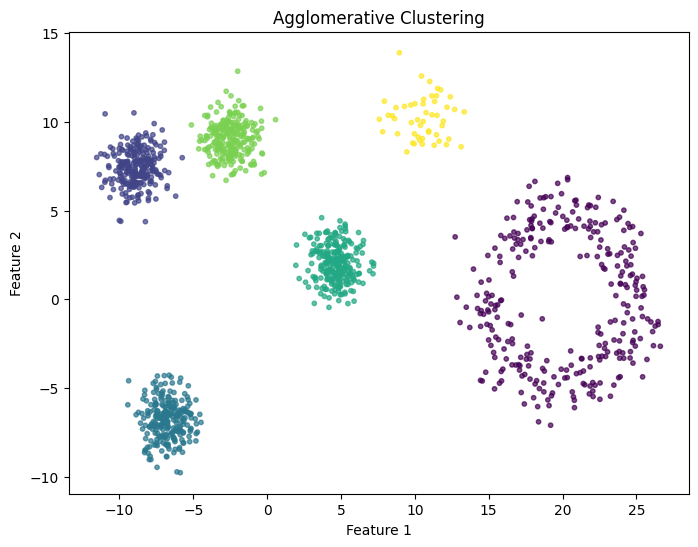

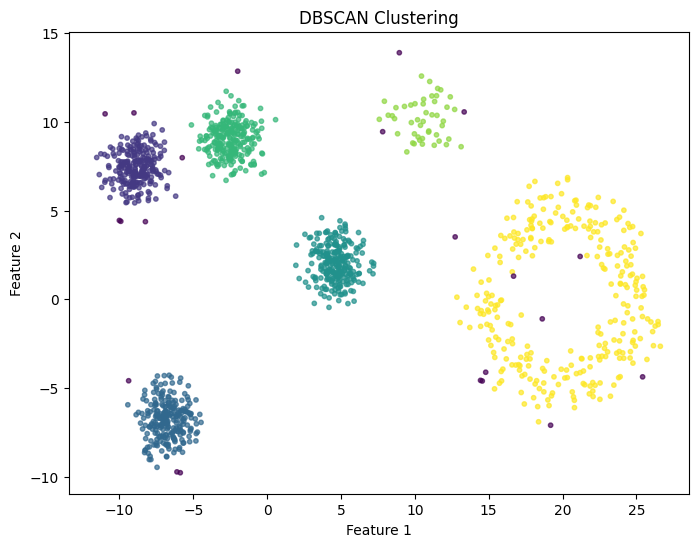

KMeans Silhouette Score: 0.7251181630059241
Agglomerative Clustering Silhouette Score: 0.7256900714288006
DBSCAN Silhouette Score: 0.7070123298589694


In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming you have trained KMeans, Agglomerative Clustering, and DBSCAN models and their labels are stored in:
# kmeans_labels, agg_labels, dbscan_labels

# 1. Visual Comparison:

# Plot for KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot for Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Plot for DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 2. Silhouette Score Comparison:

kmeans_silhouette = silhouette_score(X, kmeans_labels)
agg_silhouette = silhouette_score(X, agg_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

# 3. Analysis and Conclusion:

# Based on the visual inspection of the plots and the Silhouette scores,
# analyze which clustering method performed best for your data.

# Example Conclusion:
# "After comparing the results, DBSCAN appears to have performed the best,
# as it effectively captured the clusters with varying shapes and densities.
# It also achieved the highest Silhouette score, indicating better cluster separation."